### 导入数据

#### 提取节点的Attribute

In [1]:
import pandas as pd
import numpy as np
pd.set_option('display.max_rows',10) # 调整pandas行的显示限制 
node_features = pd.read_csv('C:/Users/deven/Desktop/CPIs/data/Drug_Protein_Attribute.csv',header = None) 
node_features  

,0,1,2,3,4,5,6,7,8,9,...,55,56,57,58,59,60,61,62,63,64
0,0,-0.007599,-0.007655,-0.003703,-0.007203,0.002032,0.006483,0.005779,-0.008866,-0.004960,...,-0.005631,0.002488,-0.013618,-0.008738,0.007777,0.005095,0.003780,-0.015584,-0.005586,0.004156
1,1,-0.007599,-0.007655,-0.003703,-0.007203,0.002032,0.006483,0.005779,-0.008866,-0.004960,...,-0.005631,0.002488,-0.013618,-0.008738,0.007777,0.005095,0.003780,-0.015584,-0.005586,0.004156
2,2,-0.007599,-0.007655,-0.003703,-0.007203,0.002032,0.006483,0.005779,-0.008866,-0.004960,...,-0.005631,0.002488,-0.013618,-0.008738,0.007777,0.005095,0.003780,-0.015584,-0.005586,0.004156
3,3,-0.007599,-0.007655,-0.003703,-0.007203,0.002032,0.006483,0.005779,-0.008866,-0.004960,...,-0.005631,0.002488,-0.013618,-0.008738,0.007777,0.005095,0.003780,-0.015584,-0.005586,0.004156
4,4,1.180584,0.526513,0.793145,-0.245426,-0.220634,0.559357,1.059898,0.148331,-0.981740,...,0.003815,-0.553314,0.003378,0.335591,0.143528,-1.134055,0.629610,0.330191,0.377519,-0.798777
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1614,1614,0.115819,0.086158,0.011299,0.008475,0.086158,0.074859,0.011299,0.007062,0.012712,...,0.001412,0.002825,0.002825,0.000000,0.001412,0.002825,0.002825,0.001412,0.002825,0.000000
1615,1615,0.153169,0.107394,0.017606,0.007042,0.096831,0.056338,0.012324,0.012324,0.019366,...,0.000000,0.000000,0.003521,0.000000,0.000000,0.001761,0.005282,0.000000,0.000000,0.000000
1616,1616,0.120000,0.111667,0.020000,0.008333,0.106667,0.060000,0.018333,0.008333,0.018333,...,0.001667,0.000000,0.001667,0.001667,0.000000,0.000000,0.005000,0.001667,0.000000,0.003333
1617,1617,0.131970,0.105948,0.009294,0.020446,0.098513,0.053903,0.020446,0.007435,0.014870,...,0.005576,0.001859,0.007435,0.000000,0.003717,0.000000,0.001859,0.001859,0.001859,0.000000


In [2]:
# 将词向量提取为特征,第二列到倒数第一列
node_features = node_features.iloc[:,1:]
 # 检查特征：共64个特征，837个样本点
print(node_features.shape)

(1619, 64)


#### 划分训练集测试集

In [3]:
DTIs= pd.read_csv('C:/Users/deven/Desktop/CPIs/data/Drug_Protein_Num.csv',header = None) 
DTIs 

,0,1
0,0,984
1,0,985
2,0,986
3,1,987
4,1,988
...,...,...
11391,877,1322
11392,877,1324
11393,969,1324
11394,969,1129


#### 生成随机种子

In [4]:
import math
import random
def partition(ls, size):
    """
    Returns a new list with elements
    of which is a list of certain size.

        >>> partition([1, 2, 3, 4], 3)
        [[1, 2, 3], [4]]
    """
    return [ls[i:i+size] for i in range(0, len(ls), size)]
# 由AllEdge产生RandomList
RandomList = random.sample(range(0, len(DTIs)), len(DTIs))
print('len(RandomList)', len(RandomList))
NewRandomList = partition(RandomList, math.ceil(len(RandomList) / 5))
print('len(NewRandomList[0])', len(NewRandomList[0]))
#NaN = pd.isnull(NewRandomList).any(0).nonzero()[0]
NewRandomList = pd.DataFrame(NewRandomList)
NewRandomList = NewRandomList.fillna(int(0))
NewRandomList = NewRandomList.astype(int)
NewRandomList.to_csv('C:/Users/deven/Desktop/CPIs/data/NewRandomList.csv', header=None,index=False)
#del NewRandomList, RandomList
NewRandomList

len(RandomList) 11396
len(NewRandomList[0]) 2280


,0,1,2,3,4,5,6,7,8,9,...,2270,2271,2272,2273,2274,2275,2276,2277,2278,2279
0,6179,5082,10008,4589,2231,8443,5009,879,8844,140,...,7076,5592,1771,722,10104,4773,5349,10630,3904,5771
1,7132,5704,2952,362,10841,10188,10957,3802,3572,10661,...,8281,5926,10294,2194,3205,10683,5151,5497,6149,8605
2,2882,2099,9007,4158,10952,7788,5272,7019,4420,5175,...,10450,7113,11311,4693,5247,4193,5923,1259,2523,8088
3,7280,1729,4642,3209,10602,5455,3510,3468,6669,4040,...,4340,2948,10712,3844,4176,9548,1087,11182,10870,10746
4,636,3810,2321,6952,4280,2903,8976,9002,3136,3778,...,2411,8930,9247,3073,5203,1328,0,0,0,0


In [5]:
Nindex = pd.read_csv('C:/Users/deven/Desktop/CPIs/data/NewRandomList.csv',header=None)
for i in range(len(Nindex)):
    kk = []
    for j in range(5):
        if j !=i:
            kk.append(j)
    index = np.hstack([np.array(Nindex)[kk[0]],np.array(Nindex)[kk[1]],np.array(Nindex)[kk[2]],np.array(Nindex)[kk[3]]])
    DTIs_train= pd.DataFrame(np.array(DTIs)[index])
    DTIs_train.to_csv('C:/Users/deven/Desktop/CPIs/data/DTIs_train'+str(i)+'.csv', header=None,index=False)
    DTIs_train = DTIs_train.sample(frac=1.0)
    DTIs_train.to_csv('C:/Users/deven/Desktop/CPIs/data/DTIs_train'+str(i)+'.txt', sep='\t' ,header=None,index=False)
    DTIs_test=pd.DataFrame(np.array(DTIs)[np.array(Nindex)[i]])
    DTIs_test.to_csv('C:/Users/deven/Desktop/CPIs/data/DTIs_test'+str(i)+'.csv', header=None,index=False)
    print(i)
del Nindex, index, DTIs_train, DTIs_test

0
1
2
3
4


#### 设置节点类型标签

In [6]:
labels = pd.DataFrame(np.random.rand(max(DTIs[1])+1,1))#pd.DataFrame(np.random.rand(max(NLMI_num),1))
labels[0:max(DTIs[0])+1]=0
labels[max(DTIs[0])+1:]=1
labels = labels[0] # 提取节点标签列
labels.to_csv('C:/Users/deven/Desktop/CPIs/data/labels.csv',header=0,index=0)
labels[:5]

0    0.0
1    0.0
2    0.0
3    0.0
4    0.0
Name: 0, dtype: float64

### 生成负样本

In [7]:
def NegativeGenerate(LncDisease, AllRNA,AllDisease):
    # 负样本为全部的disease-rna（328*881）中随机抽取，未在内LncDisease即为负样本
    import random
    NegativeSample = []
    counterN = 0
    while counterN < len(LncDisease):  # 随机选出一个疾病rna对
        counterR = random.randint(0, len(AllRNA) - 1)
        counterD = random.randint(0, len(AllDisease) - 1)
        DiseaseAndRnaPair = []
        DiseaseAndRnaPair.append(AllRNA[counterR])
        DiseaseAndRnaPair.append(AllDisease[counterD])
        flag1 = 0
        counter = 0
        while counter < len(LncDisease):
            if DiseaseAndRnaPair == LncDisease[counter]:
                flag1 = 1
                break
            counter = counter + 1
        if flag1 == 1:
            continue
        flag2 = 0
        counter1 = 0
        while counter1 < len(NegativeSample):  # 在已选的负样本中没有，防止重复
            if DiseaseAndRnaPair == NegativeSample[counter1]:
                flag2 = 1
                break
            counter1 = counter1 + 1
        if flag2 == 1:
            continue
        if (flag1 == 0 & flag2 == 0):
            NamePair = []  # 生成对
            NamePair.append(AllRNA[counterR])
            NamePair.append(AllDisease[counterD])
            NegativeSample.append(NamePair)
            counterN = counterN + 1
    return NegativeSample
Dr = pd.read_csv('C:/Users/deven/Desktop/CPIs/data/drug_name.csv',header=0,names=['id','name'])
Pr = pd.read_csv('C:/Users/deven/Desktop/CPIs/data/protein_name.csv',header=0,names=['id','name'])
NegativeSample = NegativeGenerate(DTIs.values.tolist(),Dr['id'].values.tolist(),Pr['id'].values.tolist())
NegativeSample = pd.DataFrame(NegativeSample)
NegativeSample.to_csv('C:/Users/deven/Desktop/CPIs/data/NegativeSample.csv', header=None,index=False)
NegativeSample.head()

,0,1
0,534,1418
1,527,1443
2,859,1418
3,581,1030
4,5,1466


### 建立邻接矩阵方阵

In [8]:
# 构建初始的邻接矩阵 #('./data/DDI_train'+str(i)+'.csv')
def load_file_as_Adj_matrix(filename):
    import scipy.sparse as sp
    DTIs_train = pd.read_csv(filename,header=None)
    if max(DTIs_train[1]) != 1618:
        relation_matrix = np.zeros((1618+1,1618+1))
    else:
        relation_matrix = np.zeros((max(DTIs_train[1]+1),max(DTIs_train[1]+1)))
    for i, j in np.array(DTIs_train):
        lnc, mi = int(i), int(j)
        relation_matrix[lnc, mi] = 1
    Adj = sp.csr_matrix(relation_matrix, dtype=np.float32)
    return Adj

In [9]:
# 构建GCN训练需要的邻接方阵
import scipy.sparse as sp
import torch
def load_data(adj,node_features,node_labels):
  features = sp.csr_matrix(node_features, dtype=np.float32)  # 储存为csr型稀疏矩阵
  # build symmetric adjacency matrix   论文里A^=(D~)^0.5 A~ (D~)^0.5这个公式
  # adj = adj + adj.T.multiply(adj.T > adj) - adj.multiply(adj.T > adj)
  # 对于无向图，邻接矩阵是对称的。上一步得到的adj是按有向图构建的，转换成无向图的邻接矩阵需要扩充成对称矩阵
  features = normalize(features)
  adj = normalize(adj + sp.eye(adj.shape[0]))   # eye创建单位矩阵，第一个参数为行数，第二个为列数
  # 对应公式A~=A+IN
  # 分别构建训练集、验证集、测试集，并创建特征矩阵、标签向量和邻接矩阵的tensor，用来做模型的输入
  idx_train = range(500)
  idx_val = range(500, 660)
  idx_test = range(660, int(adj.shape[0]))  
  features = torch.FloatTensor(np.array(features.todense()))  # tensor为pytorch常用的数据结构
  labels = torch.LongTensor(np.array(node_labels))
  adj = sparse_mx_to_torch_sparse_tensor(adj)   # 邻接矩阵转为tensor处理
  idx_train = torch.LongTensor(idx_train)
  idx_val = torch.LongTensor(idx_val)
  idx_test = torch.LongTensor(idx_test)
  return adj, features, labels, idx_train, idx_val, idx_test  
def normalize(mx):
  """Row-normalize sparse matrix"""
  rowsum = np.array(mx.sum(1))  # 对每一行求和
  r_inv = np.power(rowsum, -1).flatten()  # 求倒数
  r_inv[np.isinf(r_inv)] = 0.  # 如果某一行全为0，则r_inv算出来会等于无穷大，将这些行的r_inv置为0
  r_mat_inv = sp.diags(r_inv)  # 构建对角元素为r_inv的对角矩阵
  mx = r_mat_inv.dot(mx)
  # 用对角矩阵与原始矩阵的点积起到标准化的作用，原始矩阵中每一行元素都会与对应的r_inv相乘，最终相当于除以了sum
  return mx

def accuracy(output, labels):
  preds = output.max(1)[1].type_as(labels) # 使用type_as(tesnor)将张量转换为给定类型的张量。
  correct = preds.eq(labels).double()  # 记录等于preds的label eq:equal
  correct = correct.sum()
  return correct / len(labels)

def sparse_mx_to_torch_sparse_tensor(sparse_mx):    # 把一个sparse matrix转为torch稀疏张量
  """
  numpy中的ndarray转化成pytorch中的tensor : torch.from_numpy()
  pytorch中的tensor转化成numpy中的ndarray : numpy()
  """
  sparse_mx = sparse_mx.tocoo().astype(np.float32)
  indices = torch.from_numpy(np.vstack((sparse_mx.row, sparse_mx.col)).astype(np.int64))
  # 不懂的可以去看看COO性稀疏矩阵的结构
  values = torch.from_numpy(sparse_mx.data)
  shape = torch.Size(sparse_mx.shape)
  return torch.sparse.FloatTensor(indices, values, shape)

### 构建GCN

In [10]:
import math
import torch
from torch.nn.parameter import Parameter
from torch.nn.modules.module import Module

class GraphConvolution(Module):

    # 初始化层：输入feature，输出feature，权重，偏移
    def __init__(self, in_features, out_features, bias=True):
        super(GraphConvolution, self).__init__()
        self.in_features = in_features
        self.out_features = out_features
        self.weight = Parameter(torch.FloatTensor(in_features, out_features))  # FloatTensor建立tensor
        # 常见用法self.v = torch.nn.Parameter(torch.FloatTensor(hidden_size))：
        # 首先可以把这个函数理解为类型转换函数，将一个不可训练的类型Tensor转换成可以训练的类型parameter并将这个parameter
        # 绑定到这个module里面，所以经过类型转换这个self.v变成了模型的一部分，成为了模型中根据训练可以改动的参数了。
        # 使用这个函数的目的也是想让某些变量在学习的过程中不断的修改其值以达到最优化。
        if bias:
            self.bias = Parameter(torch.FloatTensor(out_features))
        else:
            self.register_parameter('bias', None)
            # Parameters与register_parameter都会向parameters写入参数，但是后者可以支持字符串命名
        self.reset_parameters()

    # 初始化权重
    def reset_parameters(self):
        stdv = 1. / math.sqrt(self.weight.size(1))
        # size()函数主要是用来统计矩阵元素个数，或矩阵某一维上的元素个数的函数  size（1）为行
        self.weight.data.uniform_(-stdv, stdv)  # uniform() 方法将随机生成下一个实数，它在 [x, y] 范围内
        if self.bias is not None:
            self.bias.data.uniform_(-stdv, stdv)

    '''
    前馈运算 即计算A~ X W(0)
    input X与权重W相乘，然后adj矩阵与他们的积稀疏乘
    直接输入与权重之间进行torch.mm操作，得到support，即XW
    support与adj进行torch.spmm操作，得到output，即AXW选择是否加bias
    '''
    def forward(self, input, adj):
        support = torch.mm(input, self.weight)
        # torch.mm(a, b)是矩阵a和b矩阵相乘，torch.mul(a, b)是矩阵a和b对应位相乘，a和b的维度必须相等
        output = torch.spmm(adj, support)
        if self.bias is not None:
            return output + self.bias 
        else:
            return output
#通过设置断点，可以看出output的形式是0.01，0.01，0.01，0.01，0.01，#0.01，0.94]，里面的值代表该x对应标签不同的概率，故此值可转换为#[0,0,0,0,0,0,1]，对应我们之前把标签onthot后的第七种标签

    def __repr__(self):
        return self.__class__.__name__ + ' (' \
               + str(self.in_features) + ' -> ' \
               + str(self.out_features) + ')'



In [11]:
import torch.nn as nn
import torch.nn.functional as F
class GCN(nn.Module):
  def __init__(self, nfeat, nhid, nclass, dropout):
    # 底层节点的参数，feature的个数；隐层节点个数；最终的分类数
    super(GCN, self).__init__()  #  super()._init_()在利用父类里的对象构造函数
    self.gc1 = GraphConvolution(nfeat, nhid)   # gc1输入尺寸nfeat，输出尺寸nhid
    self.gc2 = GraphConvolution(nhid, nclass)  # gc2输入尺寸nhid，输出尺寸ncalss
    self.dropout = dropout
    self.weight = Parameter(torch.FloatTensor(nfeat, nhid))  # FloatTensor建立tensor
    # 输入分别是特征和邻接矩阵。最后输出为输出层做log_softmax变换的结果
  def forward(self, x, adj):
    x = F.relu(self.gc1(x, adj))   # adj即公式Z=softmax(A~Relu(A~XW(0))W(1))中的A~
    x2 = F.dropout(x, self.dropout, training = self.training)  # x要dropout
    x2 = self.gc2(x2, adj)
    return F.log_softmax(x2, dim = 1), x2   #, x  # 参数dim=1表示对每一行求softmax，那么每一行的值加起来都等于1。

In [12]:
import numpy
print(numpy.__version__)

1.21.6


### 使用GCN训练属性

In [19]:
# Training settings
learning_rate = 0.001
weight_decay = 5e-4
epoch_num = 200
dropout = 0.02
#in_size = node_features  #设置输入层的维数
hi_size = 64 # 16 #设置隐藏层的维数

name = locals() # 利用locals()创建变量
for i in range(5):
    Adj = load_file_as_Adj_matrix('C:/Users/deven/Desktop/CPIs/data/DTIs_train'+str(i)+'.csv')
    adj, train_features, trian_labels, idx_train, idx_val, idx_test = load_data(Adj,node_features,labels)
    model = GCN(nfeat=train_features.shape[1],
            nhid=hi_size,
            nclass= 16,#labels.max().item() + 1,
            dropout=dropout)
    model.train()
    global Emdebding_train, output
    output, Emdebding_train = model(train_features, adj)
    Emdebding_GCN = pd.DataFrame(Emdebding_train.detach().numpy())
    GCN_A = pd.concat([Emdebding_GCN, node_features], axis=1)
    GCN_A.to_csv('C:/Users/deven/Desktop/CPIs/data/Emdebding_GCN_1'+str(i)+'.csv', header=None,index=False)
    del Adj, adj, train_features, trian_labels, idx_train, idx_val, idx_test, output
    print(i)
GCN_A.head()

0
1
2
3
4


,0,1,2,3,4,5,6,7,8,9,...,55,56,57,58,59,60,61,62,63,64
0,-0.002017,0.285975,-0.242441,0.092218,0.133022,-0.147303,0.177822,0.143870,-0.052570,0.409478,...,-0.005631,0.002488,-0.013618,-0.008738,0.007777,0.005095,0.00378,-0.015584,-0.005586,0.004156
1,0.007029,0.279250,-0.240330,0.072541,0.137073,-0.155054,0.182000,0.145197,-0.038130,0.422240,...,-0.005631,0.002488,-0.013618,-0.008738,0.007777,0.005095,0.00378,-0.015584,-0.005586,0.004156
2,-0.015418,0.282529,-0.245394,0.080528,0.132047,-0.145283,0.177963,0.153724,-0.043670,0.413333,...,-0.005631,0.002488,-0.013618,-0.008738,0.007777,0.005095,0.00378,-0.015584,-0.005586,0.004156
3,0.011028,0.274603,-0.240878,0.081691,0.153182,-0.146155,0.174052,0.157553,-0.049456,0.407972,...,-0.005631,0.002488,-0.013618,-0.008738,0.007777,0.005095,0.00378,-0.015584,-0.005586,0.004156
4,0.014302,0.272048,-0.244375,0.072798,0.157080,-0.156632,0.173336,0.160591,-0.053562,0.407942,...,0.003815,-0.553314,0.003378,0.335591,0.143528,-1.134055,0.62961,0.330191,0.377519,-0.798777


In [20]:
dd = pd.DataFrame(np.random.randint(0,1,node_features.shape[0]))
dd['index']=dd.index
dd

,0,index
0,0,0
1,0,1
2,0,2
3,0,3
4,0,4
...,...,...
1614,0,1614
1615,0,1615
1616,0,1616
1617,0,1617


### 生成最终训练的数据

In [21]:
import scipy.sparse as sp
import pandas as pd
import numpy as np
creat_var = locals() # 利用locals()创建变量
creat_var = locals() # 利用locals()创建变量
Negative = pd.read_csv('C:/Users/deven/Desktop/CPIs/data/NegativeSample.csv',header=None)
Nindex = pd.read_csv('C:/Users/deven/Desktop/CPIs/data/NewRandomList.csv',header=None)
Negative[2] = Negative.apply(lambda x: 0 if x[0] < 0 else 0, axis=1)
for i in range(5):
    data_train_feature, data_test_feature = [], []
    Embedding_GCN = pd.read_csv('C:/Users/deven/Desktop/CPIs/data/Emdebding_GCN_1'+str(i)+'.csv',header=None)
    Embedding_grarep = pd.read_csv('C:/Users/deven/Desktop/CPIs/data/Embedding_grarep'+str(i)+'.txt', sep=' ',header=None, error_bad_lines=False)
    Embedding_grarep = Embedding_grarep.sort_values(0,ascending=True)# 建立序号排序
    Embedding_grarep.set_index(0, inplace=True)
    Embedding_grarep['index'] = Embedding_grarep.index
    Embedding = pd.merge(dd,Embedding_grarep,how='left',on='index')
    Embedding = Embedding.fillna(int(0)).iloc[:,2:]
    train_data = pd.read_csv('C:/Users/deven/Desktop/CPIs/data/DTIs_train'+str(i)+'.csv',header=None)
    train_data[2] = train_data.apply(lambda x: 1 if x[0] < 0 else 1, axis=1)
    kk = []
    for j in range(5):
        if j !=i:
            kk.append(j)
    index = np.hstack([np.array(Nindex)[kk[0]],np.array(Nindex)[kk[1]],np.array(Nindex)[kk[2]],np.array(Nindex)[kk[3]]])
    result = train_data.append(pd.DataFrame(np.array(Negative)[index]))    
    labels_train = result[2]# np.hstack([np.array(Embedding_GCN)[result.iloc[r,0]],np.array(Embedding_Node2vec)[result.iloc[r,0]]])
    for r in range(len(result)):# np.hstack([np.array(Embedding_GCN)[result.iloc[r,1]],np.array(Embedding_Node2vec)[result.iloc[r,1]]])
        data_train_feature.append(np.hstack([np.hstack([np.array(Embedding_GCN)[result.iloc[r,0]],np.array(Embedding)[result.iloc[r,0]]]),
                                             np.hstack([np.array(Embedding_GCN)[result.iloc[r,1]],np.array(Embedding)[result.iloc[r,1]]])]))
    creat_var['data_train'+str(i)] = data_train_feature
    creat_var['labels_train'+str(i)] = labels_train
    print(len(labels_train))
    del labels_train, result, data_train_feature, r
    test_data = pd.read_csv('C:/Users/deven/Desktop/CPIs/data/DTIs_test'+str(i)+'.csv',header=None)
    test_data[2] = test_data.apply(lambda x: 1 if x[0] < 0 else 1, axis=1)
    result = test_data.append(pd.DataFrame(np.array(Negative)[np.array(Nindex)[i]]))    
    labels_test = result[2]# np.hstack([np.array(Embedding_GCN)[result.iloc[x,0]],np.array(Embedding_Node2vec)[result.iloc[x,0]]])
    for x in range(len(result)):#np.hstack([np.array(Embedding_GCN)[result.iloc[x,1]],np.array(Embedding_Node2vec)[result.iloc[x,1]]])
        data_test_feature.append(np.hstack([np.hstack([np.array(Embedding_GCN)[result.iloc[x,0]],np.array(Embedding)[result.iloc[x,0]]]),
                                            np.hstack([np.array(Embedding_GCN)[result.iloc[x,1]],np.array(Embedding)[result.iloc[x,1]]])]))
    creat_var['data_test'+str(i)] = data_test_feature
    creat_var['labels_test'+str(i)] = labels_test
    print(len(labels_test))
    del train_data, test_data, labels_test, result, data_test_feature, x#, Embedding_Node2vec, Embedding, Embedding_GCN    
    print(i)

18240
4560
0
18240
4560
1
18240
4560
2
18240
4560
3
18240
4560
4


In [22]:
data_train = [data_train0,data_train1,data_train2,data_train3,data_train4]
data_test = [data_test0,data_test1,data_test2,data_test3,data_test4]
labels_train = [labels_train0,labels_train1,labels_train2,labels_train3,labels_train4]
labels_test = [labels_test0,labels_test1,labels_test2,labels_test3,labels_test4]
print(np.array(data_train0).shape)
print(np.array(data_test0).shape)
print(np.array(labels_train0).shape)
print(np.array(labels_test0).shape)

(18240, 416)
(4560, 416)
(18240,)
(4560,)


### 开始训练

#### 评价指标

In [23]:
# 评价指标
import math
def MyConfusionMatrix(y_real,y_predict): 
    from sklearn.metrics import confusion_matrix
    CM = confusion_matrix(y_real, y_predict)
    print(CM)
    CM = CM.tolist()
    TN = CM[0][0]
    FP = CM[0][1]
    FN = CM[1][0]
    TP = CM[1][1] 
    print('TN:%d, FP:%d, FN:%d, TP:%d' % (TN, FP, FN, TP))
    Acc = (TN + TP) / (TN + TP + FN + FP)
    Sen = TP / (TP + FN)
    Spec = TN / (TN + FP)
    Prec = TP / (TP + FP)
    MCC = (TP * TN - FP * FN) / math.sqrt((TP + FP) * (TP + FN) * (TN + FP) * (TN + FN))
    # 分母可能出现0，需要讨论待续
    print('Acc:', round(Acc, 4))
    print('Sen:', round(Sen, 4))
    print('Spec:', round(Spec, 4))
    print('Prec:', round(Prec, 4))
    print('MCC:', round(MCC, 4))
    Result = []
    Result.append(round(Acc, 4))
    Result.append(round(Sen, 4))
    Result.append(round(Spec, 4))
    Result.append(round(Prec, 4))
    Result.append(round(MCC, 4))
    return Result

def MyAverage(matrix):
    SumAcc = 0
    SumSen = 0
    SumSpec = 0
    SumPrec = 0
    SumMcc = 0
    counter = 0
    while counter < len(matrix):
        SumAcc = SumAcc + matrix[counter][0]
        SumSen = SumSen + matrix[counter][1]
        SumSpec = SumSpec + matrix[counter][2]
        SumPrec = SumPrec + matrix[counter][3]
        SumMcc = SumMcc + matrix[counter][4]
        counter = counter + 1
    print('AverageAcc:',SumAcc / len(matrix))
    print('AverageSen:', SumSen / len(matrix))
    print('AverageSpec:', SumSpec / len(matrix))
    print('AveragePrec:', SumPrec / len(matrix))
    print('AverageMcc:', SumMcc / len(matrix))
    return

def MyStd(result):
    import numpy as np
    NewMatrix = []
    counter = 0
    while counter < len(result[0]):
        row = []
        NewMatrix.append(row)
        counter = counter + 1
    counter = 0
    while counter < len(result):
        counter1 = 0
        while counter1 < len(result[counter]):
            NewMatrix[counter1].append(result[counter][counter1])
            counter1 = counter1 + 1
        counter = counter + 1
    StdList = []
    MeanList = []
    counter = 0
    while counter < len(NewMatrix):
        # std
        arr_std = np.std(NewMatrix[counter], ddof=1)
        StdList.append(arr_std)
        # mean
        arr_mean = np.mean(NewMatrix[counter])
        MeanList.append(arr_mean)
        counter = counter + 1
    result.append(MeanList)
    result.append(StdList)
    # 换算成百分比制
    counter = 0
    while counter < len(result):
        counter1 = 0
        while counter1 < len(result[counter]):
            result[counter][counter1] = round(result[counter][counter1] * 100, 2)
            counter1 = counter1 + 1
        counter = counter + 1
    return result

import csv
def StorFile(data, fileName):
    with open(fileName, "w", newline='') as csvfile:
        writer = csv.writer(csvfile)
        writer.writerows(data)
    return

#### 使用Machine Learning

进行5折交叉验证
正在划分训练集和测试集...
划分完毕！
开始训练
[[2131  149]
 [ 287 1993]]
---------------------------------------------

fold =  0
---------------------------------------------

[[2131  149]
 [ 287 1993]]
TN:2131, FP:149, FN:287, TP:1993
Acc: 0.9044
Sen: 0.8741
Spec: 0.9346
Prec: 0.9304
MCC: 0.8103
正在划分训练集和测试集...
划分完毕！
开始训练


D:\Program Files\Anaconda\envs\dpi_py37\lib\site-packages\ipykernel_launcher.py:77: DeprecationWarning: scipy.interp is deprecated and will be removed in SciPy 2.0.0, use numpy.interp instead


[[2142  138]
 [ 301 1979]]
---------------------------------------------

fold =  1
---------------------------------------------

[[2142  138]
 [ 301 1979]]
TN:2142, FP:138, FN:301, TP:1979
Acc: 0.9037
Sen: 0.868
Spec: 0.9395
Prec: 0.9348
MCC: 0.8095
正在划分训练集和测试集...
划分完毕！
开始训练


D:\Program Files\Anaconda\envs\dpi_py37\lib\site-packages\ipykernel_launcher.py:77: DeprecationWarning: scipy.interp is deprecated and will be removed in SciPy 2.0.0, use numpy.interp instead


[[2147  133]
 [ 326 1954]]
---------------------------------------------

fold =  2
---------------------------------------------

[[2147  133]
 [ 326 1954]]
TN:2147, FP:133, FN:326, TP:1954
Acc: 0.8993
Sen: 0.857
Spec: 0.9417
Prec: 0.9363
MCC: 0.8016
正在划分训练集和测试集...
划分完毕！
开始训练


D:\Program Files\Anaconda\envs\dpi_py37\lib\site-packages\ipykernel_launcher.py:77: DeprecationWarning: scipy.interp is deprecated and will be removed in SciPy 2.0.0, use numpy.interp instead


[[2132  148]
 [ 333 1947]]
---------------------------------------------

fold =  3
---------------------------------------------

[[2132  148]
 [ 333 1947]]
TN:2132, FP:148, FN:333, TP:1947
Acc: 0.8945
Sen: 0.8539
Spec: 0.9351
Prec: 0.9294
MCC: 0.7916
正在划分训练集和测试集...
划分完毕！
开始训练


D:\Program Files\Anaconda\envs\dpi_py37\lib\site-packages\ipykernel_launcher.py:77: DeprecationWarning: scipy.interp is deprecated and will be removed in SciPy 2.0.0, use numpy.interp instead


[[2167  113]
 [ 331 1949]]
---------------------------------------------

fold =  4
---------------------------------------------

[[2167  113]
 [ 331 1949]]
TN:2167, FP:113, FN:331, TP:1949
Acc: 0.9026
Sen: 0.8548
Spec: 0.9504
Prec: 0.9452
MCC: 0.809
AverageAcc: 0.9008999999999998
AverageSen: 0.8615600000000001
AverageSpec: 0.94026
AveragePrec: 0.9352199999999999
AverageMcc: 0.8044


D:\Program Files\Anaconda\envs\dpi_py37\lib\site-packages\ipykernel_launcher.py:77: DeprecationWarning: scipy.interp is deprecated and will be removed in SciPy 2.0.0, use numpy.interp instead


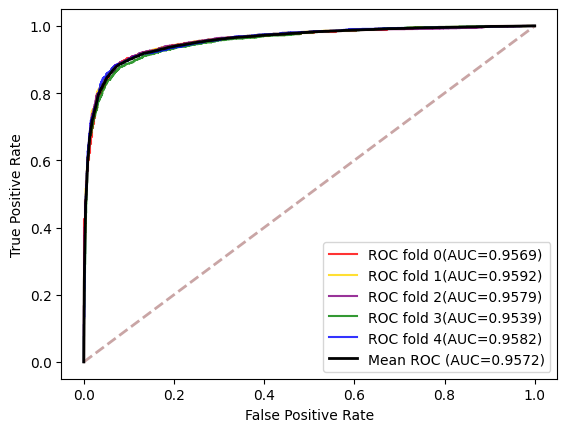

In [24]:
from xgboost import XGBClassifier
from sklearn.metrics import confusion_matrix
from sklearn.model_selection import StratifiedKFold
import joblib
from sklearn.model_selection import cross_val_score
# 画ROC曲线，计算AUC
import matplotlib.pyplot as plt
from sklearn.metrics import roc_curve
from sklearn.metrics import auc
from scipy import interp
import time
import numpy as np

now = time.strftime("%Y-%m-%d-%H_%M_%S",time.localtime(time.time()))

# print("迭代寻找最优参数")
# k_range = [301, 401, 501, 601, 701, 801, 901, 999]
# cv_scores = [] #用来放每个模型的结果值
# for n in k_range:
#     print('n_estimators: %d '%(n))
#     RandomF = RandomForestClassifier(n_estimators=n)   #knn模型，这里一个超参数可以做预测，当多个超参数时需要使用另一种方法GridSearchCV
#     scores = cross_val_score(RandomF,data_train0, labels_train0,
#                              cv=5,
#                              scoring='roc_auc', 
#                              n_jobs=-1)  #cv：选择每次测试折数  accuracy：评价指标是准确度,可以省略使用默认值，具体使用参考下面。
#     cv_scores.append(scores.mean())
# print("best_n_neighbors is：", k_range[cv_scores.index(max(cv_scores))])

print("进行5折交叉验证")
tprs=[]
aucs=[]
mean_fpr=np.linspace(0,1,1000)
# 定义i用于绘制每次训练的ROC曲线

# ROC曲线颜色
colorlist = ['red', 'gold', 'purple', 'green', 'blue', 'black']
# 保存评价指标
AllResult = []

#data为数据集,利用KF.split划分训练集和测试集
for i in range(5):
    #建立模型，并对训练集进行测试，求出预测得分
    #划分训练集和测试集
    print('正在划分训练集和测试集...')
    X_train,X_test = data_train[i],data_test[i]
    Y_train,Y_test = np.array(labels_train[i]),np.array(labels_test[i])
    print('划分完毕！')
    #建立模型 # n_estimators=k_range[cv_scores.index(max(cv_scores))]
    best_XGB = XGBClassifier(learning_rate=0.15,max_depth=500,n_estimators=500)
#                                  n_estimators=100,  ##树的个数
#                                  max_depth=4,        ##树额深度
#                                  min_child_weight=1,  ##叶子节点最小权重
#                                  gamma=0,             ##惩罚项中叶子节点个数前的参数
#                                  subsample=1,         ##所有样本建立决策树
#                                  colsample_btree=1,   ##所有特征建立决策树
#                                  scale_pos_weight=1,  ##解决样本个数不平衡的问题
#                                  random_state=27,     ##随机数
#                                  slient=0)
    print('开始训练')
    #训练模型
    best_XGB.fit(np.array(X_train), np.array(Y_train))
    # 保存模型
    joblib.dump(best_XGB,'C:/Users/deven/Desktop/CPIs/model/'+'XGB'+str(i)+'.pkl')
    #利用model.predict获取测试集的预测值
    y_score0 = best_XGB.predict(np.array(X_test))
    y_score_XGB = best_XGB.predict_proba(np.array(X_test))
    # 输出混淆矩阵
    print(confusion_matrix(Y_test, y_score0)) # , labels=[1,0]
    
    dd = np.vstack([Y_test, y_score_XGB[:,1]]).T
    XGB_data = pd.DataFrame(dd)
    XGB_data.to_csv('C:/Users/deven/Desktop/CPIs/predict/' + 'XGB_'+ str(i)+ 'Prob.csv', header = False, index = False)
    
    #计算fpr(假阳性率),tpr(真阳性率),thresholds(阈值)[绘制ROC曲线要用到这几个值]
    fpr,tpr,thresholds=roc_curve(Y_test,y_score_XGB[:,1])
    #interp:插值 把结果添加到tprs列表中 
    tprs.append(interp(mean_fpr,fpr,tpr))
    tprs[-1][0]=0.0
    #计算auc
    roc_auc=auc(fpr,tpr)
    aucs.append(roc_auc)
    #画图，只需要plt.plot(fpr,tpr),变量roc_auc只是记录auc的值，通过auc()函数计算出来
    plt.plot(fpr,tpr,lw=1.5,alpha=0.8,color=colorlist[i],
             label='ROC fold %d(AUC=%0.4f)'% (i,roc_auc))
    print("---------------------------------------------\n")
    print("fold = ", i)
    print("---------------------------------------------\n")
    Result = MyConfusionMatrix(Y_test, y_score0)
    AllResult.append(Result)
    AllResult[i].append(roc_auc)
    i +=1

# 保存各种评价指标
MyAverage(AllResult)
# AllResult
# print('AllResult', AllResult)
MyNew = MyStd(AllResult)
# StorFile(MyNew, '五折的评价指标.csv')
df = pd.DataFrame(data = MyNew)
df.to_csv('C:/Users/deven/Desktop/CPIs/evaluate/XGB_5-fold.csv', encoding='utf-8',header=None,index=False)

#画对角线
plt.plot([0,1],[0,1],linestyle='--',lw=2,color='rosybrown',alpha=0.8)
mean_tpr=np.mean(tprs,axis=0)
mean_tpr[-1]=1.0
mean_auc=auc(mean_fpr,mean_tpr)#计算平均AUC值
std_auc=np.std(tprs,axis=0)
plt.plot(mean_fpr,mean_tpr,color=colorlist[i],label=r'Mean ROC (AUC=%0.4f)'%mean_auc,lw=2,alpha=1)
std_tpr=np.std(tprs,axis=0)
plt.xlim([-0.05,1.05])
plt.ylim([-0.05,1.05])
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.legend(loc='best')
plt.savefig('C:/Users/deven/Desktop/CPIs/image/'+ now + 'XGB.svg')
plt.show()      

#### 画5折的PR图

average_precision 0.9628331804855893
average_precision 0.9633621183335368
average_precision 0.9636442059818807
average_precision 0.958096418970273
average_precision 0.9625621147423457


D:\Program Files\Anaconda\envs\dpi_py37\lib\site-packages\ipykernel_launcher.py:30: DeprecationWarning: scipy.interp is deprecated and will be removed in SciPy 2.0.0, use numpy.interp instead
D:\Program Files\Anaconda\envs\dpi_py37\lib\site-packages\ipykernel_launcher.py:30: DeprecationWarning: scipy.interp is deprecated and will be removed in SciPy 2.0.0, use numpy.interp instead
D:\Program Files\Anaconda\envs\dpi_py37\lib\site-packages\ipykernel_launcher.py:30: DeprecationWarning: scipy.interp is deprecated and will be removed in SciPy 2.0.0, use numpy.interp instead
D:\Program Files\Anaconda\envs\dpi_py37\lib\site-packages\ipykernel_launcher.py:30: DeprecationWarning: scipy.interp is deprecated and will be removed in SciPy 2.0.0, use numpy.interp instead
D:\Program Files\Anaconda\envs\dpi_py37\lib\site-packages\ipykernel_launcher.py:30: DeprecationWarning: scipy.interp is deprecated and will be removed in SciPy 2.0.0, use numpy.interp instead


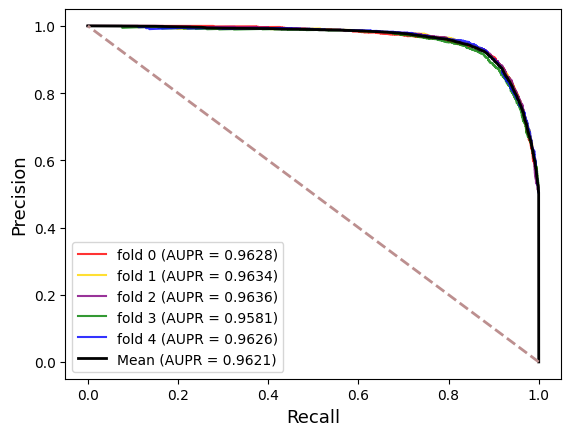

In [25]:
from sklearn.metrics import average_precision_score
from sklearn.metrics import precision_recall_curve
import matplotlib.pyplot as plt
from scipy import interp
import numpy as np

mean_fpr = np.linspace(0, 1, 1000)
i = 0
colorlist = ['red', 'gold', 'purple', 'green', 'blue', 'black']

Ps = []
#Rs = []
RPs = []
mean_R = np.linspace(0, 1, 1000)
#Reals = []
#PredictionProbs = []

for i in range(5):
    # 读取文件
    RAPNameProb = 'C:/Users/deven/Desktop/CPIs/predict/' + 'XGB_'+ str(i)+ 'Prob.csv'
    RealAndPredictionProb = pd.read_csv(RAPNameProb, header=None)
    
    Real = RealAndPredictionProb[0]
    # Prediction = RealAndPrediction[1]
    PredictionProb = RealAndPredictionProb[1]

    average_precision = average_precision_score(Real, PredictionProb)
    precision, recall, _ = precision_recall_curve(Real, PredictionProb)

    Ps.append(interp(mean_R, precision, recall))
    RPs.append(average_precision)

    #Reals.append(Real)
    #PredictionProbs.append(PredictionProb)
    # 弧线
    plt.plot(recall, precision, lw=1.5, alpha=0.8, color=colorlist[i],
             label='fold %d (AUPR = %0.4f)' % (i, average_precision))
    print('average_precision', average_precision)

#  画均值
mean_P = np.mean(Ps, axis=0)
mean_RPs = np.mean(RPs, axis=0)
#std_RPs = np.std(RPs)
plt.plot(mean_P, mean_R, color='black',
         label=r'Mean (AUPR = %0.4f)' % (mean_RPs),
         lw=2, alpha=1)
plt.xlabel('Recall',fontsize=13)
plt.ylabel('Precision',fontsize=13)
plt.xlim([-0.05,1.05])
plt.ylim([-0.05,1.05])
# 画对角线
plt.plot([1, 0], [0, 1], color='rosybrown', lw=2, linestyle='--')
plt.legend(loc='best')
plt.savefig('C:/Users/deven/Desktop/CPIs/image/XGB_PR-5fold.svg')
plt.show()

### 比较不同的分类器

DecisionTree的实现

进行5折交叉验证
正在划分训练集和测试集...
划分完毕！
开始训练
[[1940  340]
 [ 424 1856]]
---------------------------------------------

fold =  0
---------------------------------------------

[[1940  340]
 [ 424 1856]]
TN:1940, FP:340, FN:424, TP:1856
Acc: 0.8325
Sen: 0.814
Spec: 0.8509
Prec: 0.8452
MCC: 0.6654
正在划分训练集和测试集...
划分完毕！
开始训练


D:\Program Files\Anaconda\envs\dpi_py37\lib\site-packages\ipykernel_launcher.py:68: DeprecationWarning: scipy.interp is deprecated and will be removed in SciPy 2.0.0, use numpy.interp instead


[[1865  415]
 [ 396 1884]]
---------------------------------------------

fold =  1
---------------------------------------------

[[1865  415]
 [ 396 1884]]
TN:1865, FP:415, FN:396, TP:1884
Acc: 0.8221
Sen: 0.8263
Spec: 0.818
Prec: 0.8195
MCC: 0.6443
正在划分训练集和测试集...
划分完毕！
开始训练


D:\Program Files\Anaconda\envs\dpi_py37\lib\site-packages\ipykernel_launcher.py:68: DeprecationWarning: scipy.interp is deprecated and will be removed in SciPy 2.0.0, use numpy.interp instead


[[1927  353]
 [ 417 1863]]
---------------------------------------------

fold =  2
---------------------------------------------

[[1927  353]
 [ 417 1863]]
TN:1927, FP:353, FN:417, TP:1863
Acc: 0.8311
Sen: 0.8171
Spec: 0.8452
Prec: 0.8407
MCC: 0.6625
正在划分训练集和测试集...
划分完毕！
开始训练


D:\Program Files\Anaconda\envs\dpi_py37\lib\site-packages\ipykernel_launcher.py:68: DeprecationWarning: scipy.interp is deprecated and will be removed in SciPy 2.0.0, use numpy.interp instead


[[1913  367]
 [ 438 1842]]
---------------------------------------------

fold =  3
---------------------------------------------

[[1913  367]
 [ 438 1842]]
TN:1913, FP:367, FN:438, TP:1842
Acc: 0.8235
Sen: 0.8079
Spec: 0.839
Prec: 0.8339
MCC: 0.6472
正在划分训练集和测试集...
划分完毕！
开始训练


D:\Program Files\Anaconda\envs\dpi_py37\lib\site-packages\ipykernel_launcher.py:68: DeprecationWarning: scipy.interp is deprecated and will be removed in SciPy 2.0.0, use numpy.interp instead


[[1901  379]
 [ 459 1821]]
---------------------------------------------

fold =  4
---------------------------------------------

[[1901  379]
 [ 459 1821]]
TN:1901, FP:379, FN:459, TP:1821
Acc: 0.8162
Sen: 0.7987
Spec: 0.8338
Prec: 0.8277
MCC: 0.6328
AverageAcc: 0.82508
AverageSen: 0.8128
AverageSpec: 0.8373799999999999
AveragePrec: 0.8333999999999999
AverageMcc: 0.6504399999999999


D:\Program Files\Anaconda\envs\dpi_py37\lib\site-packages\ipykernel_launcher.py:68: DeprecationWarning: scipy.interp is deprecated and will be removed in SciPy 2.0.0, use numpy.interp instead


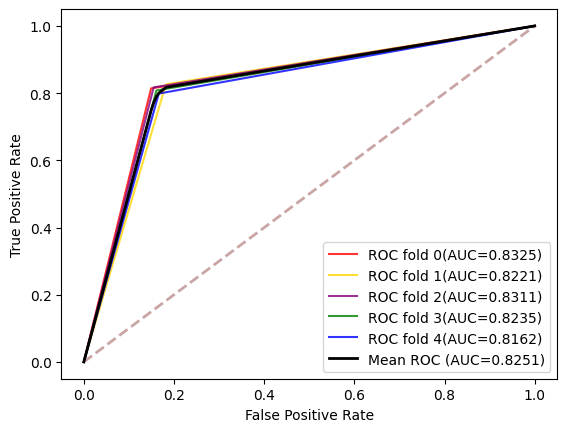

In [27]:
from sklearn.tree import DecisionTreeClassifier
from sklearn.metrics import confusion_matrix
from sklearn.model_selection import StratifiedKFold
import joblib
from sklearn.model_selection import cross_val_score
# 画ROC曲线，计算AUC
import matplotlib.pyplot as plt
from sklearn.metrics import roc_curve
from sklearn.metrics import auc
from scipy import interp
import time

now = time.strftime("%Y-%m-%d-%H_%M_%S",time.localtime(time.time()))

# print("迭代寻找最优参数")
# k_range = [301, 401, 501, 601, 701, 801, 901, 999]
# cv_scores = [] #用来放每个模型的结果值
# for n in k_range:
#     print('n_estimators: %d '%(n))
#     RandomF = RandomForestClassifier(n_estimators=n)   #knn模型，这里一个超参数可以做预测，当多个超参数时需要使用另一种方法GridSearchCV
#     scores = cross_val_score(RandomF,data_train0, labels_train0,
#                              cv=5,
#                              scoring='roc_auc', 
#                              n_jobs=-1)  #cv：选择每次测试折数  accuracy：评价指标是准确度,可以省略使用默认值，具体使用参考下面。
#     cv_scores.append(scores.mean())
# print("best_n_neighbors is：", k_range[cv_scores.index(max(cv_scores))])

print("进行5折交叉验证")
tprs=[]
aucs=[]
mean_fpr=np.linspace(0,1,1000)
# 定义i用于绘制每次训练的ROC曲线

# ROC曲线颜色
colorlist = ['red', 'gold', 'purple', 'green', 'blue', 'black']
# 保存评价指标
AllResult = []

#data为数据集,利用KF.split划分训练集和测试集
for i in range(5):
    #建立模型，并对训练集进行测试，求出预测得分
    #划分训练集和测试集
    print('正在划分训练集和测试集...')
    X_train,X_test = data_train[i],data_test[i]
    Y_train,Y_test = np.array(labels_train[i]),np.array(labels_test[i])
    print('划分完毕！')
#     best_adb = HistGradientBoostingClassifier()
    #建立模型 # n_estimators=k_range[cv_scores.index(max(cv_scores))]
    best_cart = DecisionTreeClassifier()
    print('开始训练')
    #训练模型
    best_cart.fit(np.array(X_train), np.array(Y_train))
    # 保存模型
    joblib.dump(best_cart,'C:/Users/deven/Desktop/CPIs/model/'+'CART'+str(i)+'.pkl')
    #利用model.predict获取测试集的预测值
    y_score0 = best_cart.predict(np.array(X_test))
    y_score_cart = best_cart.predict_proba(np.array(X_test))
    # 输出混淆矩阵
    print(confusion_matrix(Y_test, y_score0)) # , labels=[1,0]
    
    dd = np.vstack([Y_test, y_score_cart[:,1]]).T
    cart_data = pd.DataFrame(dd)
    cart_data.to_csv('C:/Users/deven/Desktop/CPIs/predict/' + 'CART_'+ str(i)+ 'Prob.csv', header = False, index = False)
    
    #计算fpr(假阳性率),tpr(真阳性率),thresholds(阈值)[绘制ROC曲线要用到这几个值]
    fpr,tpr,thresholds=roc_curve(Y_test,y_score_cart[:,1])
    #interp:插值 把结果添加到tprs列表中 
    tprs.append(interp(mean_fpr,fpr,tpr))
    tprs[-1][0]=0.0
    #计算auc
    roc_auc=auc(fpr,tpr)
    aucs.append(roc_auc)
    #画图，只需要plt.plot(fpr,tpr),变量roc_auc只是记录auc的值，通过auc()函数计算出来
    plt.plot(fpr,tpr,lw=1.5,alpha=0.8,color=colorlist[i],
             label='ROC fold %d(AUC=%0.4f)'% (i,roc_auc))
    print("---------------------------------------------\n")
    print("fold = ", i)
    print("---------------------------------------------\n")
    Result = MyConfusionMatrix(Y_test, y_score0)
    AllResult.append(Result)
    AllResult[i].append(roc_auc)
    i +=1

# 保存各种评价指标
MyAverage(AllResult)
# AllResult
# print('AllResult', AllResult)
MyNew = MyStd(AllResult)
# StorFile(MyNew, '五折的评价指标.csv')
df = pd.DataFrame(data = MyNew)
df.to_csv('C:/Users/deven/Desktop/CPIs/evaluate/CART_5-fold.csv', encoding='utf-8',header=None,index=False)

#画对角线
plt.plot([0,1],[0,1],linestyle='--',lw=2,color='rosybrown',alpha=0.8)
mean_tpr=np.mean(tprs,axis=0)
mean_tpr[-1]=1.0
mean_auc=auc(mean_fpr,mean_tpr)#计算平均AUC值
std_auc=np.std(tprs,axis=0)
plt.plot(mean_fpr,mean_tpr,color=colorlist[i],label=r'Mean ROC (AUC=%0.4f)'%mean_auc,lw=2,alpha=1)
std_tpr=np.std(tprs,axis=0)
plt.xlim([-0.05,1.05])
plt.ylim([-0.05,1.05])
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.legend(loc='best')
plt.savefig('C:/Users/deven/Desktop/CPIs/image/'+ now + 'CART_ROC.svg')
plt.show()      

#### GaussianNB的实现

进行5折交叉验证
正在划分训练集和测试集...
划分完毕！
开始训练
[[1467  813]
 [ 517 1763]]
---------------------------------------------

fold =  0
---------------------------------------------

[[1467  813]
 [ 517 1763]]
TN:1467, FP:813, FN:517, TP:1763
Acc: 0.7083
Sen: 0.7732
Spec: 0.6434
Prec: 0.6844
MCC: 0.4202
正在划分训练集和测试集...
划分完毕！
开始训练


D:\Program Files\Anaconda\envs\dpi_py37\lib\site-packages\ipykernel_launcher.py:63: DeprecationWarning: scipy.interp is deprecated and will be removed in SciPy 2.0.0, use numpy.interp instead
D:\Program Files\Anaconda\envs\dpi_py37\lib\site-packages\ipykernel_launcher.py:63: DeprecationWarning: scipy.interp is deprecated and will be removed in SciPy 2.0.0, use numpy.interp instead


[[1561  719]
 [ 547 1733]]
---------------------------------------------

fold =  1
---------------------------------------------

[[1561  719]
 [ 547 1733]]
TN:1561, FP:719, FN:547, TP:1733
Acc: 0.7224
Sen: 0.7601
Spec: 0.6846
Prec: 0.7068
MCC: 0.446
正在划分训练集和测试集...
划分完毕！
开始训练
[[1461  819]
 [ 464 1816]]
---------------------------------------------

fold =  2
---------------------------------------------

[[1461  819]
 [ 464 1816]]
TN:1461, FP:819, FN:464, TP:1816
Acc: 0.7186
Sen: 0.7965
Spec: 0.6408
Prec: 0.6892
MCC: 0.4427
正在划分训练集和测试集...
划分完毕！
开始训练


D:\Program Files\Anaconda\envs\dpi_py37\lib\site-packages\ipykernel_launcher.py:63: DeprecationWarning: scipy.interp is deprecated and will be removed in SciPy 2.0.0, use numpy.interp instead
D:\Program Files\Anaconda\envs\dpi_py37\lib\site-packages\ipykernel_launcher.py:63: DeprecationWarning: scipy.interp is deprecated and will be removed in SciPy 2.0.0, use numpy.interp instead


[[1498  782]
 [ 535 1745]]
---------------------------------------------

fold =  3
---------------------------------------------

[[1498  782]
 [ 535 1745]]
TN:1498, FP:782, FN:535, TP:1745
Acc: 0.7112
Sen: 0.7654
Spec: 0.657
Prec: 0.6905
MCC: 0.4249
正在划分训练集和测试集...
划分完毕！
开始训练
[[ 689 1591]
 [ 236 2044]]
---------------------------------------------

fold =  4
---------------------------------------------

[[ 689 1591]
 [ 236 2044]]
TN:689, FP:1591, FN:236, TP:2044
Acc: 0.5993
Sen: 0.8965
Spec: 0.3022
Prec: 0.5623
MCC: 0.247
AverageAcc: 0.69196
AverageSen: 0.79834
AverageSpec: 0.5856
AveragePrec: 0.66664
AverageMcc: 0.39615999999999996


D:\Program Files\Anaconda\envs\dpi_py37\lib\site-packages\ipykernel_launcher.py:63: DeprecationWarning: scipy.interp is deprecated and will be removed in SciPy 2.0.0, use numpy.interp instead


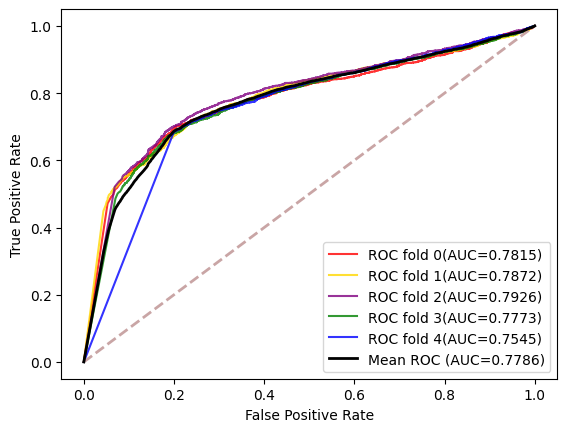

In [28]:
from sklearn.naive_bayes import GaussianNB
from sklearn.metrics import confusion_matrix
from sklearn.model_selection import StratifiedKFold
import joblib
from sklearn.model_selection import cross_val_score
# 画ROC曲线，计算AUC
import matplotlib.pyplot as plt
from sklearn.metrics import roc_curve
from sklearn.metrics import auc
from scipy import interp
import time

now = time.strftime("%Y-%m-%d-%H_%M_%S",time.localtime(time.time()))

# print("迭代寻找最优参数")
# k_range = range(500,1000,20)
# cv_scores = []#用来放每个模型的结果值
# for n in k_range:
#     GBDT = GradientBoostingClassifier(n_estimators=n, subsample=0.8)   #knn模型，这里一个超参数可以做预测，当多个超参数时需要使用另一种方法GridSearchCV
#     scores = cross_val_score(GBDT,np.hstack([np.array(X_train1), np.array(X_train2)]), np.array(y_train1),cv=5,scoring='accuracy',n_jobs=-1)  #cv：选择每次测试折数  accuracy：评价指标是准确度,可以省略使用默认值，具体使用参考下面。
#     cv_scores.append(scores.mean())
# print("best_n_neighbors is："k_range[cv_scores.index(max(cv_scores))])

print("进行5折交叉验证")
tprs=[]
aucs=[]
mean_fpr=np.linspace(0,1,1000)
# 定义i用于绘制每次训练的ROC曲线

# ROC曲线颜色
colorlist = ['red', 'gold', 'purple', 'green', 'blue', 'black']
# 保存评价指标
AllResult = []

#data为数据集,利用KF.split划分训练集和测试集
for i in range(5):
    #建立模型，并对训练集进行测试，求出预测得分
    #划分训练集和测试集
    print('正在划分训练集和测试集...')
    X_train,X_test = data_train[i],data_test[i]
    Y_train,Y_test = np.array(labels_train[i]),np.array(labels_test[i])
    print('划分完毕！')
    #建立模型 # n_estimators=k_range[cv_scores.index(max(cv_scores))]
    best_nb = GaussianNB()# 选择最优的K=3传入模型
    print('开始训练')
    #训练模型
    best_nb.fit(np.array(X_train), np.array(Y_train))
    # 保存模型
    joblib.dump(best_nb,'C:/Users/deven/Desktop/CPIs/model/'+'GNB'+str(i)+'.pkl')
    #利用model.predict获取测试集的预测值
    y_score0 = best_nb.predict(np.array(X_test))
    y_score_nb = best_nb.predict_proba(np.array(X_test))
    # 输出混淆矩阵
    print(confusion_matrix(Y_test, y_score0))
    
    dd = np.vstack([Y_test, y_score_nb[:,1]]).T
    nb_data = pd.DataFrame(dd)
    nb_data.to_csv('C:/Users/deven/Desktop/CPIs/predict/' + 'GNB_'+ str(i)+ 'Prob.csv', header = False, index = False)
    
    #计算fpr(假阳性率),tpr(真阳性率),thresholds(阈值)[绘制ROC曲线要用到这几个值]
    fpr,tpr,thresholds=roc_curve(Y_test,y_score_nb[:,1])
    #interp:插值 把结果添加到tprs列表中 
    tprs.append(interp(mean_fpr,fpr,tpr))
    tprs[-1][0]=0.0
    #计算auc
    roc_auc=auc(fpr,tpr)
    aucs.append(roc_auc)
    #画图，只需要plt.plot(fpr,tpr),变量roc_auc只是记录auc的值，通过auc()函数计算出来
    plt.plot(fpr,tpr,lw=1.5,alpha=0.8,color=colorlist[i],
             label='ROC fold %d(AUC=%0.4f)'% (i,roc_auc))
    print("---------------------------------------------\n")
    print("fold = ", i)
    print("---------------------------------------------\n")
    Result = MyConfusionMatrix(Y_test, y_score0)
    AllResult.append(Result)
    AllResult[i].append(roc_auc)
    i +=1

# 保存各种评价指标
MyAverage(AllResult)
# AllResult
# print('AllResult', AllResult)
MyNew = MyStd(AllResult)
# StorFile(MyNew, '五折的评价指标.csv')
df = pd.DataFrame(data = MyNew)
df.to_csv('C:/Users/deven/Desktop/CPIs/evaluate/GNB_5-fold.csv', encoding='utf-8',header=None,index=False)

#画对角线
plt.plot([0,1],[0,1],linestyle='--',lw=2,color='rosybrown',alpha=0.8)
mean_tpr=np.mean(tprs,axis=0)
mean_tpr[-1]=1.0
mean_auc=auc(mean_fpr,mean_tpr)#计算平均AUC值
std_auc=np.std(tprs,axis=0)
plt.plot(mean_fpr,mean_tpr,color=colorlist[i],label=r'Mean ROC (AUC=%0.4f)'%mean_auc,lw=2,alpha=1)
std_tpr=np.std(tprs,axis=0)
plt.xlim([-0.05,1.05])
plt.ylim([-0.05,1.05])
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.legend(loc='best')
plt.savefig('C:/Users/deven/Desktop/CPIs/image/'+ now + 'GNB_ROC.svg')
plt.show()

进行5折交叉验证
正在划分训练集和测试集...
划分完毕！
开始训练
[[2084  196]
 [ 251 2029]]
---------------------------------------------

fold =  0
---------------------------------------------

[[2084  196]
 [ 251 2029]]
TN:2084, FP:196, FN:251, TP:2029
Acc: 0.902
Sen: 0.8899
Spec: 0.914
Prec: 0.9119
MCC: 0.8042
正在划分训练集和测试集...
划分完毕！
开始训练


D:\Program Files\Anaconda\envs\dpi_py37\lib\site-packages\ipykernel_launcher.py:63: DeprecationWarning: scipy.interp is deprecated and will be removed in SciPy 2.0.0, use numpy.interp instead


[[2076  204]
 [ 261 2019]]
---------------------------------------------

fold =  1
---------------------------------------------

[[2076  204]
 [ 261 2019]]
TN:2076, FP:204, FN:261, TP:2019
Acc: 0.898
Sen: 0.8855
Spec: 0.9105
Prec: 0.9082
MCC: 0.7963
正在划分训练集和测试集...
划分完毕！
开始训练


D:\Program Files\Anaconda\envs\dpi_py37\lib\site-packages\ipykernel_launcher.py:63: DeprecationWarning: scipy.interp is deprecated and will be removed in SciPy 2.0.0, use numpy.interp instead


[[2102  178]
 [ 280 2000]]
---------------------------------------------

fold =  2
---------------------------------------------

[[2102  178]
 [ 280 2000]]
TN:2102, FP:178, FN:280, TP:2000
Acc: 0.8996
Sen: 0.8772
Spec: 0.9219
Prec: 0.9183
MCC: 0.7999
正在划分训练集和测试集...
划分完毕！
开始训练


D:\Program Files\Anaconda\envs\dpi_py37\lib\site-packages\ipykernel_launcher.py:63: DeprecationWarning: scipy.interp is deprecated and will be removed in SciPy 2.0.0, use numpy.interp instead


[[2100  180]
 [ 302 1978]]
---------------------------------------------

fold =  3
---------------------------------------------

[[2100  180]
 [ 302 1978]]
TN:2100, FP:180, FN:302, TP:1978
Acc: 0.8943
Sen: 0.8675
Spec: 0.9211
Prec: 0.9166
MCC: 0.7897
正在划分训练集和测试集...
划分完毕！
开始训练


D:\Program Files\Anaconda\envs\dpi_py37\lib\site-packages\ipykernel_launcher.py:63: DeprecationWarning: scipy.interp is deprecated and will be removed in SciPy 2.0.0, use numpy.interp instead


[[2112  168]
 [ 289 1991]]
---------------------------------------------

fold =  4
---------------------------------------------

[[2112  168]
 [ 289 1991]]
TN:2112, FP:168, FN:289, TP:1991
Acc: 0.8998
Sen: 0.8732
Spec: 0.9263
Prec: 0.9222
MCC: 0.8007
AverageAcc: 0.8987400000000001
AverageSen: 0.87866
AverageSpec: 0.91876
AveragePrec: 0.9154399999999999
AverageMcc: 0.79816


D:\Program Files\Anaconda\envs\dpi_py37\lib\site-packages\ipykernel_launcher.py:63: DeprecationWarning: scipy.interp is deprecated and will be removed in SciPy 2.0.0, use numpy.interp instead


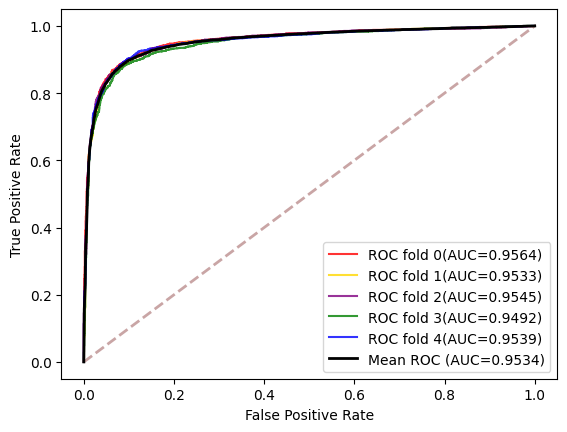

In [29]:
from sklearn.svm import SVC
from sklearn.metrics import confusion_matrix
from sklearn.model_selection import StratifiedKFold
import joblib
from sklearn.model_selection import cross_val_score
# 画ROC曲线，计算AUC
import matplotlib.pyplot as plt
from sklearn.metrics import roc_curve
from sklearn.metrics import auc
from scipy import interp
import time

now = time.strftime("%Y-%m-%d-%H_%M_%S",time.localtime(time.time()))

# print("迭代寻找最优参数")
# k_range = range(500,1000,20)
# cv_scores = []#用来放每个模型的结果值
# for n in k_range:
#     GBDT = GradientBoostingClassifier(n_estimators=n, subsample=0.8)   #knn模型，这里一个超参数可以做预测，当多个超参数时需要使用另一种方法GridSearchCV
#     scores = cross_val_score(GBDT,np.hstack([np.array(X_train1), np.array(X_train2)]), np.array(y_train1),cv=5,scoring='accuracy',n_jobs=-1)  #cv：选择每次测试折数  accuracy：评价指标是准确度,可以省略使用默认值，具体使用参考下面。
#     cv_scores.append(scores.mean())
# print("best_n_neighbors is："k_range[cv_scores.index(max(cv_scores))])

print("进行5折交叉验证")
tprs=[]
aucs=[]
mean_fpr=np.linspace(0,1,1000)
# 定义i用于绘制每次训练的ROC曲线

# ROC曲线颜色
colorlist = ['red', 'gold', 'purple', 'green', 'blue', 'black']
# 保存评价指标
AllResult = []

#data为数据集,利用KF.split划分训练集和测试集
for i in range(5):
    #建立模型，并对训练集进行测试，求出预测得分
    #划分训练集和测试集
    print('正在划分训练集和测试集...')
    X_train,X_test = data_train[i],data_test[i]
    Y_train,Y_test = np.array(labels_train[i]),np.array(labels_test[i])
    print('划分完毕！')
    #建立模型 # n_estimators=k_range[cv_scores.index(max(cv_scores))]
    best_SVC = SVC(probability=True)# 选择最优的K=3传入模型
    print('开始训练')
    #训练模型
    best_SVC.fit(np.array(X_train), np.array(Y_train))
    # 保存模型
    joblib.dump(best_SVC,'C:/Users/deven/Desktop/CPIs/model/'+'SVC'+str(i)+'.pkl')
    #利用model.predict获取测试集的预测值
    y_score0 = best_SVC.predict(np.array(X_test))
    y_score_SVC = best_SVC.predict_proba(np.array(X_test))
    # 输出混淆矩阵
    print(confusion_matrix(Y_test, y_score0))
    
    dd = np.vstack([Y_test, y_score_SVC[:,1]]).T
    SVC_data = pd.DataFrame(dd)
    SVC_data.to_csv('C:/Users/deven/Desktop/CPIs/predict/' + 'SVC_'+ str(i)+ 'Prob.csv', header = False, index = False)
    
    #计算fpr(假阳性率),tpr(真阳性率),thresholds(阈值)[绘制ROC曲线要用到这几个值]
    fpr,tpr,thresholds=roc_curve(Y_test,y_score_SVC[:,1])
    #interp:插值 把结果添加到tprs列表中 
    tprs.append(interp(mean_fpr,fpr,tpr))
    tprs[-1][0]=0.0
    #计算auc
    roc_auc=auc(fpr,tpr)
    aucs.append(roc_auc)
    #画图，只需要plt.plot(fpr,tpr),变量roc_auc只是记录auc的值，通过auc()函数计算出来
    plt.plot(fpr,tpr,lw=1.5,alpha=0.8,color=colorlist[i],
             label='ROC fold %d(AUC=%0.4f)'% (i,roc_auc))
    print("---------------------------------------------\n")
    print("fold = ", i)
    print("---------------------------------------------\n")
    Result = MyConfusionMatrix(Y_test, y_score0)
    AllResult.append(Result)
    AllResult[i].append(roc_auc)
    i +=1

# 保存各种评价指标
MyAverage(AllResult)
# AllResult
# print('AllResult', AllResult)
MyNew = MyStd(AllResult)
# StorFile(MyNew, '五折的评价指标.csv')
df = pd.DataFrame(data = MyNew)
df.to_csv('C:/Users/deven/Desktop/CPIs/evaluate/SVC_5-fold.csv', encoding='utf-8',header=None,index=False)


#画对角线
plt.plot([0,1],[0,1],linestyle='--',lw=2,color='rosybrown',alpha=0.8)
mean_tpr=np.mean(tprs,axis=0)
mean_tpr[-1]=1.0
mean_auc=auc(mean_fpr,mean_tpr)#计算平均AUC值
std_auc=np.std(tprs,axis=0)
plt.plot(mean_fpr,mean_tpr,color=colorlist[i],label=r'Mean ROC (AUC=%0.4f)'%mean_auc,lw=2,alpha=1)
std_tpr=np.std(tprs,axis=0)
plt.xlim([-0.05,1.05])
plt.ylim([-0.05,1.05])
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.legend(loc='best')
plt.savefig('C:/Users/deven/Desktop/CPIs/image/'+ now + 'SVC_ROC.svg')
plt.show()

#### 比较不同分类器画图

D:\Program Files\Anaconda\envs\dpi_py37\lib\site-packages\ipykernel_launcher.py:25: DeprecationWarning: scipy.interp is deprecated and will be removed in SciPy 2.0.0, use numpy.interp instead
D:\Program Files\Anaconda\envs\dpi_py37\lib\site-packages\ipykernel_launcher.py:25: DeprecationWarning: scipy.interp is deprecated and will be removed in SciPy 2.0.0, use numpy.interp instead
D:\Program Files\Anaconda\envs\dpi_py37\lib\site-packages\ipykernel_launcher.py:25: DeprecationWarning: scipy.interp is deprecated and will be removed in SciPy 2.0.0, use numpy.interp instead
D:\Program Files\Anaconda\envs\dpi_py37\lib\site-packages\ipykernel_launcher.py:25: DeprecationWarning: scipy.interp is deprecated and will be removed in SciPy 2.0.0, use numpy.interp instead
D:\Program Files\Anaconda\envs\dpi_py37\lib\site-packages\ipykernel_launcher.py:25: DeprecationWarning: scipy.interp is deprecated and will be removed in SciPy 2.0.0, use numpy.interp instead
D:\Program Files\Anaconda\envs\dpi_py37\

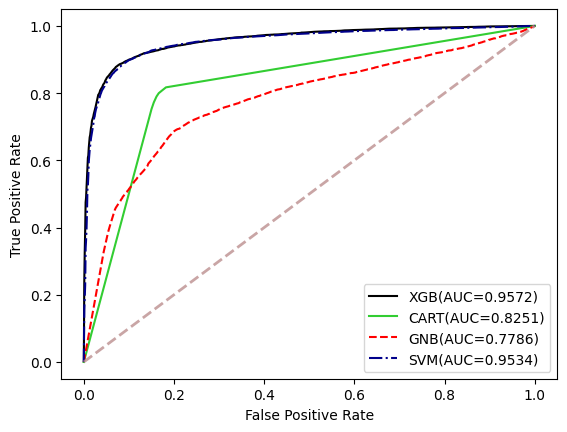

In [30]:
import pandas as pd
# 画ROC曲线，计算AUC
import matplotlib.pyplot as plt
from sklearn.metrics import roc_curve
from sklearn.metrics import auc
from scipy import interp
import time

colorlist = ['red', 'gold', 'purple', 'limegreen', 'darkblue', 'k']

for i in range(1):
    tprs = []
    aucs = []
    mean_fpr = np.linspace(0, 1, 1000)
    for j in range(5):
        # 读取文件
        RAPNameProb = 'C:/Users/deven/Desktop/CPIs/predict/XGB_' + str(j) + 'Prob.csv'
        RealAndPredictionProb = pd.read_csv(RAPNameProb, header=None)

        Real = RealAndPredictionProb[0]
        PredictionProb = RealAndPredictionProb[1]

        # 画图
        fpr, tpr, thresholds = roc_curve(Real,PredictionProb)
        tprs.append(interp(mean_fpr, fpr, tpr))
        tprs[-1][0] = 0.0
    
     # 画均值
    mean_tpr = np.mean(tprs, axis=0)
    mean_tpr[-1] = 1.0
    mean_auc = auc(mean_fpr, mean_tpr) 
    mean_tpr=np.mean(tprs,axis=0)
    mean_tpr[-1]=1.0
    mean_auc=auc(mean_fpr,mean_tpr)#计算平均AUC值
    plt.plot(mean_fpr,mean_tpr,color=colorlist[5],label=r'XGB(AUC=%0.4f)'%mean_auc,lw=1.5,alpha=1)
    tprs = []
    aucs = []
    mean_fpr = np.linspace(0, 1, 1000)
    for j in range(5):
        # 读取文件
        RAPNameProb = 'C:/Users/deven/Desktop/CPIs/predict/CART_' + str(j) + 'Prob.csv'  
        RealAndPredictionProb = pd.read_csv(RAPNameProb, header=None)

        Real = RealAndPredictionProb[0]
        PredictionProb = RealAndPredictionProb[1]

        # 画图
        fpr, tpr, thresholds = roc_curve(Real,PredictionProb)
        tprs.append(interp(mean_fpr, fpr, tpr))
        tprs[-1][0] = 0.0

     # 画均值
    mean_tpr = np.mean(tprs, axis=0)
    mean_tpr[-1] = 1.0
    mean_auc = auc(mean_fpr, mean_tpr) 
    mean_tpr=np.mean(tprs,axis=0)
    mean_tpr[-1]=1.0
    mean_auc=auc(mean_fpr,mean_tpr)#计算平均AUC值
    plt.plot(mean_fpr,mean_tpr,linestyle='-',color=colorlist[3],label=r'CART(AUC=%0.4f)'%mean_auc,lw=1.5,alpha=1)
    tprs = []
    aucs = []
    mean_fpr = np.linspace(0, 1, 1000)
    for j in range(5):
        # 读取文件
        RAPNameProb = 'C:/Users/deven/Desktop/CPIs/predict/GNB_' + str(j) + 'Prob.csv'
        RealAndPredictionProb = pd.read_csv(RAPNameProb, header=None)

        Real = RealAndPredictionProb[0]
        PredictionProb = RealAndPredictionProb[1]

        # 画图
        fpr, tpr, thresholds = roc_curve(Real,PredictionProb)
        tprs.append(interp(mean_fpr, fpr, tpr))
        tprs[-1][0] = 0.0

     # 画均值
    mean_tpr = np.mean(tprs, axis=0)
    mean_tpr[-1] = 1.0
    mean_auc = auc(mean_fpr, mean_tpr) 
    mean_tpr=np.mean(tprs,axis=0)
    mean_tpr[-1]=1.0
    mean_auc=auc(mean_fpr,mean_tpr)#计算平均AUC值
    plt.plot(mean_fpr,mean_tpr,linestyle='--',color=colorlist[0],label=r'GNB(AUC=%0.4f)'%mean_auc,lw=1.5,alpha=1)
    
    tprs = []
    aucs = []
    mean_fpr = np.linspace(0, 1, 1000)
    for j in range(5):
        # 读取文件
        RAPNameProb = 'C:/Users/deven/Desktop/CPIs/predict/SVC_' + str(j) + 'Prob.csv'
        RealAndPredictionProb = pd.read_csv(RAPNameProb, header=None)

        Real = RealAndPredictionProb[0]
        PredictionProb = RealAndPredictionProb[1]

        # 画图
        fpr, tpr, thresholds = roc_curve(Real,PredictionProb)
        tprs.append(interp(mean_fpr, fpr, tpr))
        tprs[-1][0] = 0.0

     # 画均值
    mean_tpr = np.mean(tprs, axis=0)
    mean_tpr[-1] = 1.0
    mean_auc = auc(mean_fpr, mean_tpr) 
    mean_tpr=np.mean(tprs,axis=0)
    mean_tpr[-1]=1.0
    mean_auc=auc(mean_fpr,mean_tpr)#计算平均AUC值
    plt.plot(mean_fpr,mean_tpr,linestyle='-.',color=colorlist[4],label=r'SVM(AUC=%0.4f)'%mean_auc,lw=1.5,alpha=1)  
      
plt.plot([0,1],[0,1],linestyle='--',lw=2,color='rosybrown',alpha=0.8)    
plt.xlim([-0.05,1.05])
plt.ylim([-0.05,1.05])
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.legend(loc='best')   
plt.savefig('C:/Users/deven/Desktop/CPIs/image/Compare_ROC.svg')
plt.savefig('C:/Users/deven/Desktop/CPIs/image/Compare_ROC.tif')
plt.show()      


D:\Program Files\Anaconda\envs\dpi_py37\lib\site-packages\ipykernel_launcher.py:26: DeprecationWarning: scipy.interp is deprecated and will be removed in SciPy 2.0.0, use numpy.interp instead
D:\Program Files\Anaconda\envs\dpi_py37\lib\site-packages\ipykernel_launcher.py:26: DeprecationWarning: scipy.interp is deprecated and will be removed in SciPy 2.0.0, use numpy.interp instead
D:\Program Files\Anaconda\envs\dpi_py37\lib\site-packages\ipykernel_launcher.py:26: DeprecationWarning: scipy.interp is deprecated and will be removed in SciPy 2.0.0, use numpy.interp instead
D:\Program Files\Anaconda\envs\dpi_py37\lib\site-packages\ipykernel_launcher.py:26: DeprecationWarning: scipy.interp is deprecated and will be removed in SciPy 2.0.0, use numpy.interp instead
D:\Program Files\Anaconda\envs\dpi_py37\lib\site-packages\ipykernel_launcher.py:26: DeprecationWarning: scipy.interp is deprecated and will be removed in SciPy 2.0.0, use numpy.interp instead
D:\Program Files\Anaconda\envs\dpi_py37\

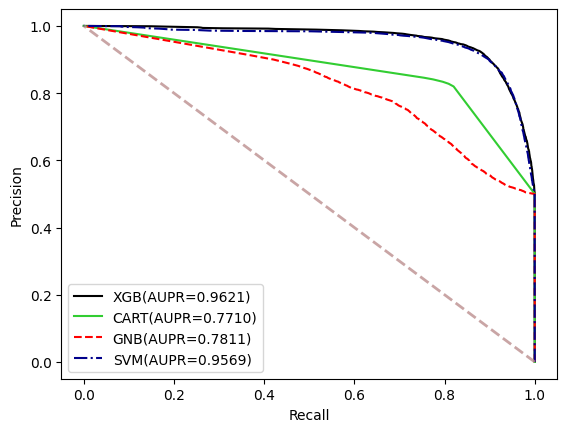

In [33]:
# 画PR曲线
from sklearn.metrics import average_precision_score
from sklearn.metrics import precision_recall_curve
import matplotlib.pyplot as plt
from scipy import interp
import numpy as np

colorlist = ['red', 'gold', 'purple', 'limegreen', 'darkblue', 'k']

for i in range(1): 
    Ps = []
    RPs = []
    mean_R = np.linspace(0, 1, 1000)
    for j in range(5):
        # 读取文件
        RAPNameProb = 'C:/Users/deven/Desktop/CPIs/predict/XGB_' + str(j) + 'Prob.csv'
        RealAndPredictionProb = pd.read_csv(RAPNameProb, header=None)

        Real = RealAndPredictionProb[0]
        PredictionProb = RealAndPredictionProb[1]

        # 画图
        average_precision = average_precision_score(Real, PredictionProb)
        precision, recall, _ = precision_recall_curve(Real, PredictionProb)

        Ps.append(interp(mean_R, precision, recall))
        RPs.append(average_precision)
    
    # 画均值
    mean_P = np.mean(Ps, axis=0)
    mean_RPs = np.mean(RPs, axis=0)
    plt.plot(mean_P, mean_R,color=colorlist[5],label=r'XGB(AUPR=%0.4f)'%mean_RPs,lw=1.5,alpha=1)
    Ps = []
    RPs = []
    mean_R = np.linspace(0, 1, 1000)
    for j in range(5):
        # 读取文件
        RAPNameProb = 'C:/Users/deven/Desktop/CPIs/predict/CART_' + str(j) + 'Prob.csv'
        RealAndPredictionProb = pd.read_csv(RAPNameProb, header=None)

        Real = RealAndPredictionProb[0]
        PredictionProb = RealAndPredictionProb[1]

        # 画图
        average_precision = average_precision_score(Real, PredictionProb)
        precision, recall, _ = precision_recall_curve(Real, PredictionProb)

        Ps.append(interp(mean_R, precision, recall))
        RPs.append(average_precision)

     # 画均值
    mean_P = np.mean(Ps, axis=0)
    mean_RPs = np.mean(RPs, axis=0)
    plt.plot(mean_P, mean_R,linestyle='-',color=colorlist[3],label=r'CART(AUPR=%0.4f)'%mean_RPs,lw=1.5,alpha=1)
    Ps = []
    RPs = []
    mean_R = np.linspace(0, 1, 1000)
    for j in range(5):
        # 读取文件
        RAPNameProb = 'C:/Users/deven/Desktop/CPIs/predict/GNB_' + str(j) + 'Prob.csv'
        RealAndPredictionProb = pd.read_csv(RAPNameProb, header=None)

        Real = RealAndPredictionProb[0]
        PredictionProb = RealAndPredictionProb[1]

        # 画图
        average_precision = average_precision_score(Real, PredictionProb)
        precision, recall, _ = precision_recall_curve(Real, PredictionProb)

        Ps.append(interp(mean_R, precision, recall))
        RPs.append(average_precision)

     # 画均值
    mean_P = np.mean(Ps, axis=0)
    mean_RPs = np.mean(RPs, axis=0)
    plt.plot(mean_P, mean_R,linestyle='--',color=colorlist[0],label=r'GNB(AUPR=%0.4f)'%mean_RPs,lw=1.5,alpha=1)

    Ps = []
    RPs = []
    mean_R = np.linspace(0, 1, 1000)
    for j in range(5):
        # 读取文件
        RAPNameProb = 'C:/Users/deven/Desktop/CPIs/predict/SVC_' + str(j) + 'Prob.csv'
        RealAndPredictionProb = pd.read_csv(RAPNameProb, header=None)

        Real = RealAndPredictionProb[0]
        PredictionProb = RealAndPredictionProb[1]

        # 画图
        average_precision = average_precision_score(Real, PredictionProb)
        precision, recall, _ = precision_recall_curve(Real, PredictionProb)

        Ps.append(interp(mean_R, precision, recall))
        RPs.append(average_precision)

     # 画均值
    mean_P = np.mean(Ps, axis=0)
    mean_RPs = np.mean(RPs, axis=0)
    plt.plot(mean_P, mean_R,linestyle='-.',color=colorlist[4],label=r'SVM(AUPR=%0.4f)'%mean_RPs,lw=1.5,alpha=1)  
      
plt.plot([1,0],[0,1],linestyle='--',lw=2,color='rosybrown',alpha=0.8)    
plt.xlim([-0.05,1.05])
plt.ylim([-0.05,1.05])
plt.xlabel('Recall')
plt.ylabel('Precision')
plt.legend(loc='best')   
plt.savefig('C:/Users/deven/Desktop/CPIs/image/Compare_PR.svg')
plt.savefig('C:/Users/deven/Desktop/CPIs/image/Compare_PR.tif')
plt.show()   